In [146]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [147]:
def imshow(title='', image=None, size=10):
    """
    نمایش یک تصویر با عنوان و اندازه قابل تنظیم
    
    Args:
        title (str): عنوان تصویر
        image (numpy.ndarray): تصویر ورودی
        size (int): اندازه نمایش
    """
    if image is None:
        print("تصویر ورودی نمی‌تواند None باشد")
        return
    
    W, H = image.shape[:2]
    aspect_ratio = H / W
    plt.figure(figsize=(aspect_ratio * size, size))
    
    # تبدیل BGR به RGB برای نمایش صحیح
    if len(image.shape) == 3:
        plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB),vmin=0, vmax=255)
    else:
        plt.imshow(image, cmap='gray',vmin=0, vmax=255)
    
    plt.title(title, fontsize=14)
    plt.axis('off')
    plt.show()

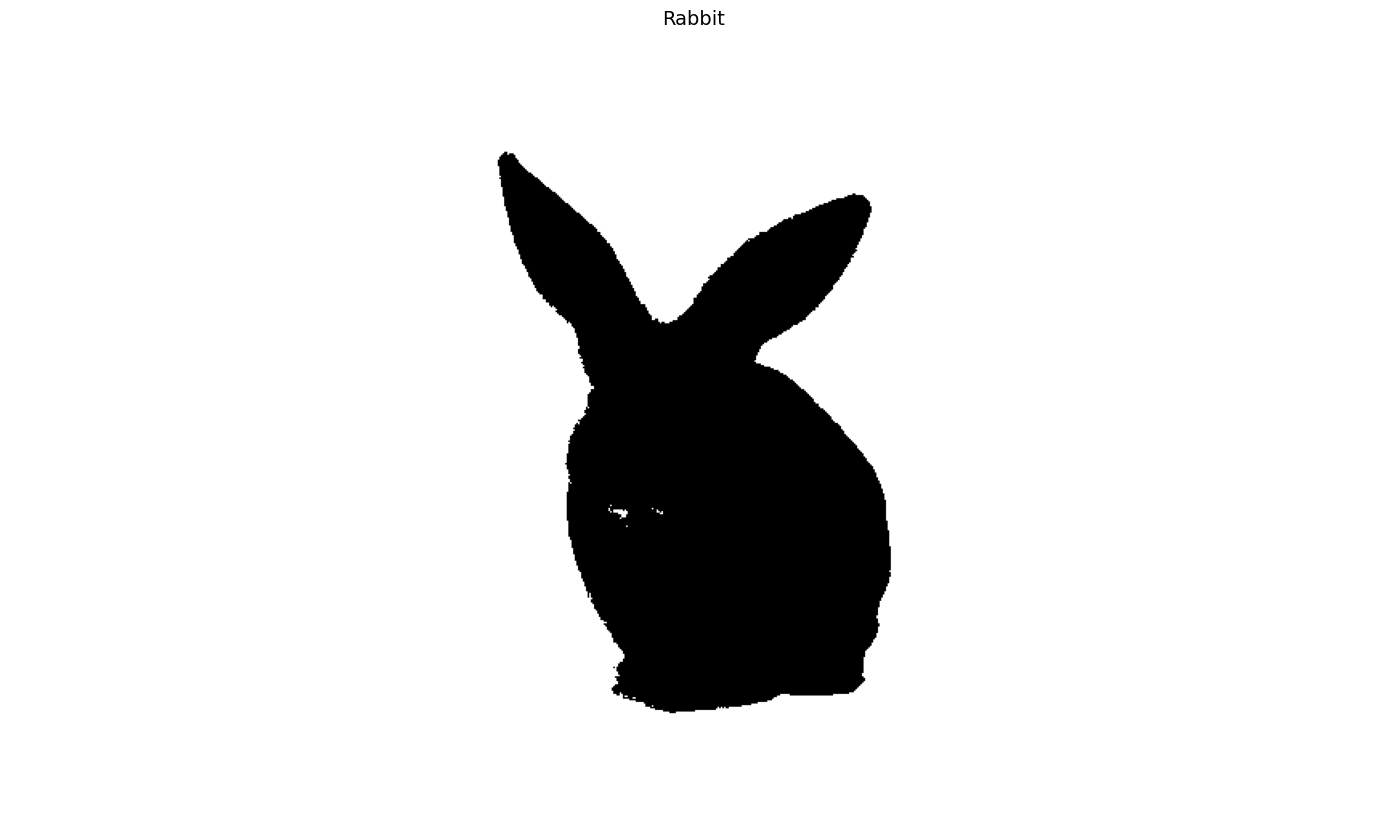

In [148]:
Rabbit = cv.imread("Rabbit.png",-1)
lower_bond = np.array([0,200,0])
upper_bond = np.array([150,255,150])

mask = cv.inRange(Rabbit, lower_bond, upper_bond)
imshow("Rabbit", mask)



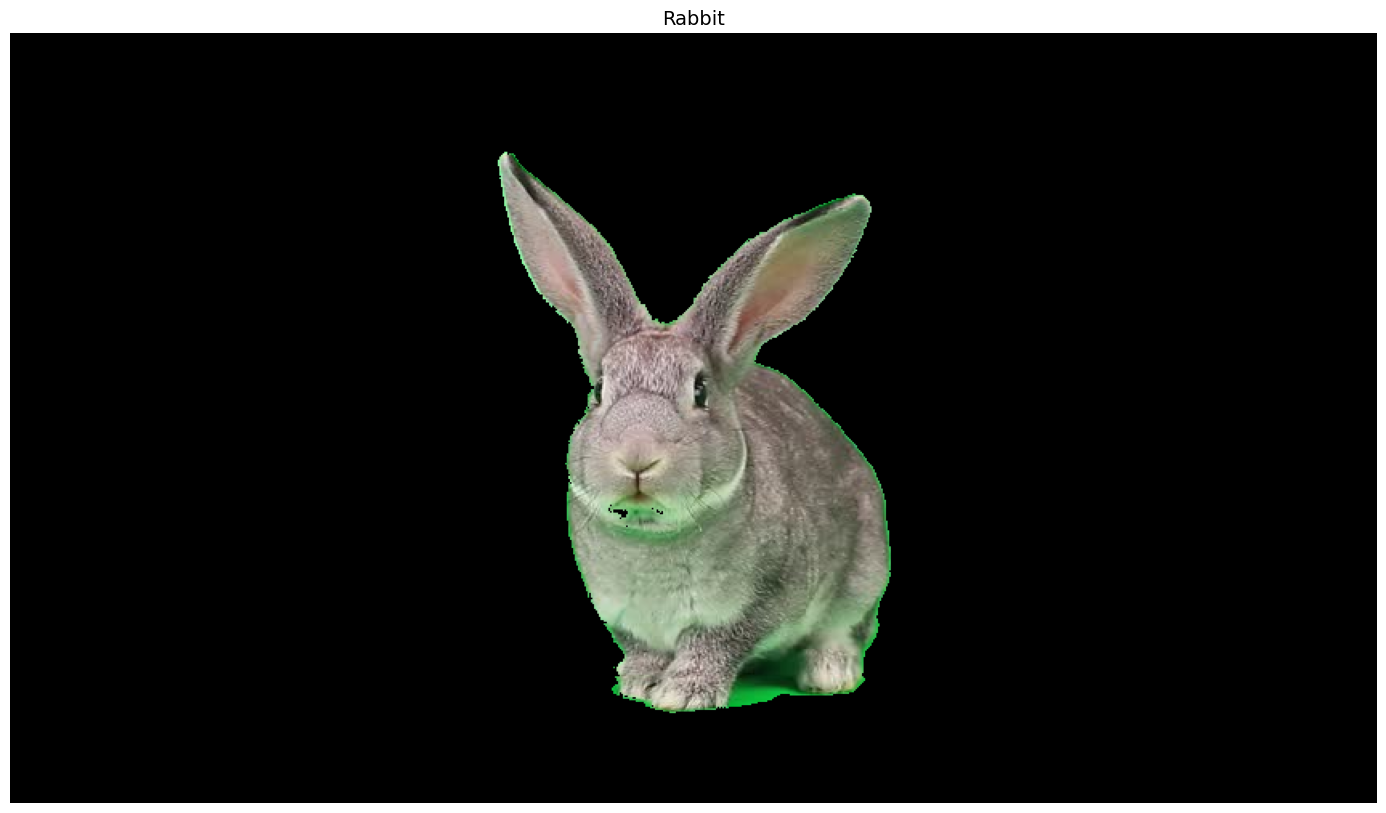

In [149]:
a = cv.bitwise_not(mask)
rabbit_img = cv.bitwise_and(Rabbit, Rabbit, mask=a)
imshow("Rabbit", rabbit_img)

151.0


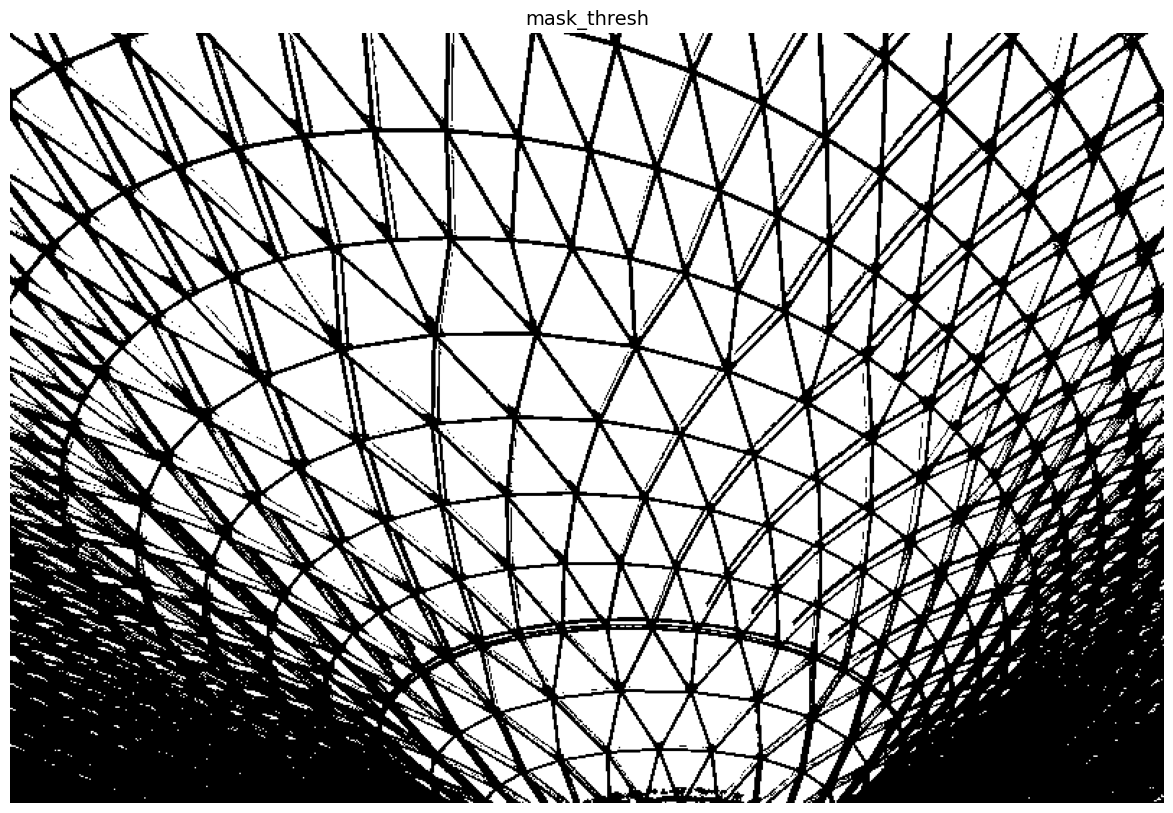

In [150]:
building = cv.imread("glass-steel-building-triangle-pattern-structure.jpg",0)
retval, mask_thresh = cv.threshold(building,0,255,cv.THRESH_OTSU)
print(retval)
imshow("mask_thresh",mask_thresh)

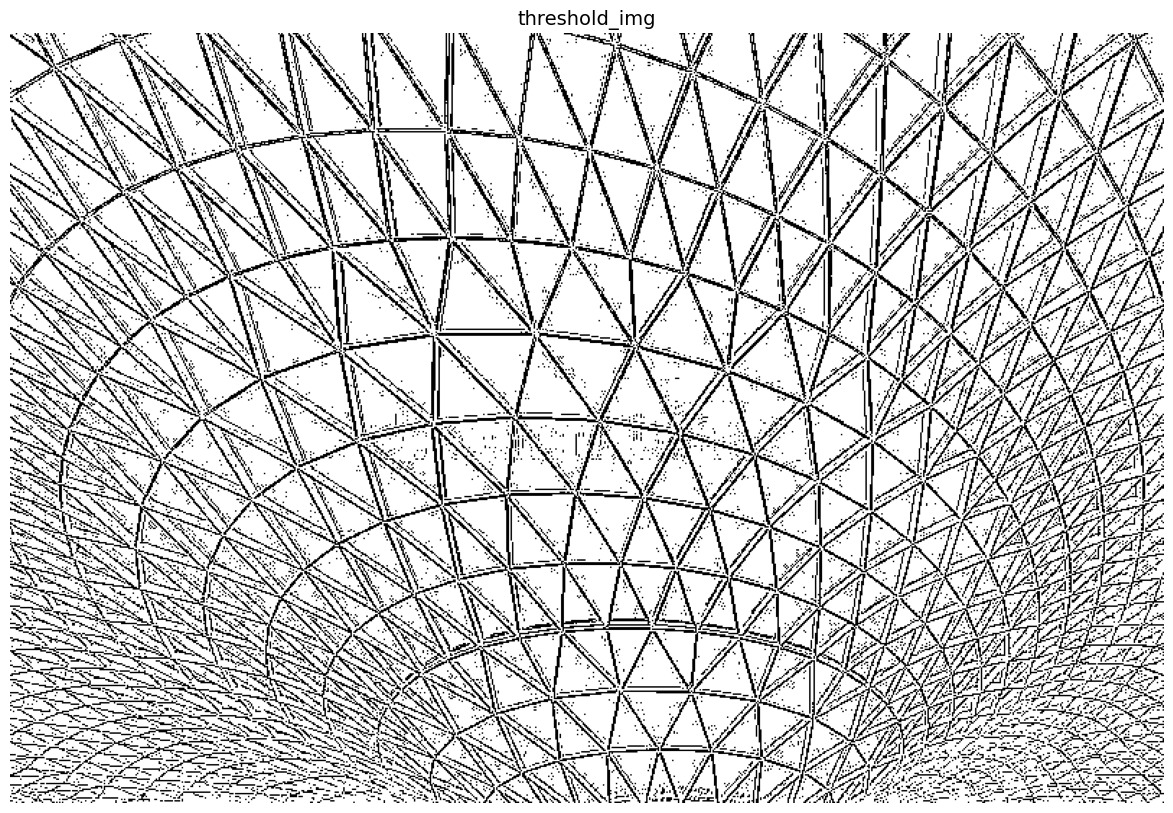

In [151]:
threshold_img = cv.adaptiveThreshold(
    building,                    # تصویر ورودی (باید سیاه‌سفید باشد)
    255,                         # مقدار بیشینه برای نواحی آستانه‌گذاری‌شده
    cv.ADAPTIVE_THRESH_GAUSSIAN_C,  # روش محاسبه مقدار آستانه (می‌تواند MEAN_C یا GAUSSIAN_C باشد)
    cv.THRESH_BINARY,           # نوع آستانه‌گذاری (معمولاً THRESH_BINARY یا THRESH_BINARY_INV)
    3,                          # اندازه بلوک (باید فرد باشد، مثل 11 یا 15)
    9                            # مقدار C که از میانگین کم می‌شود
)
imshow("threshold_img",threshold_img)

<h1>Image shifting</h1>

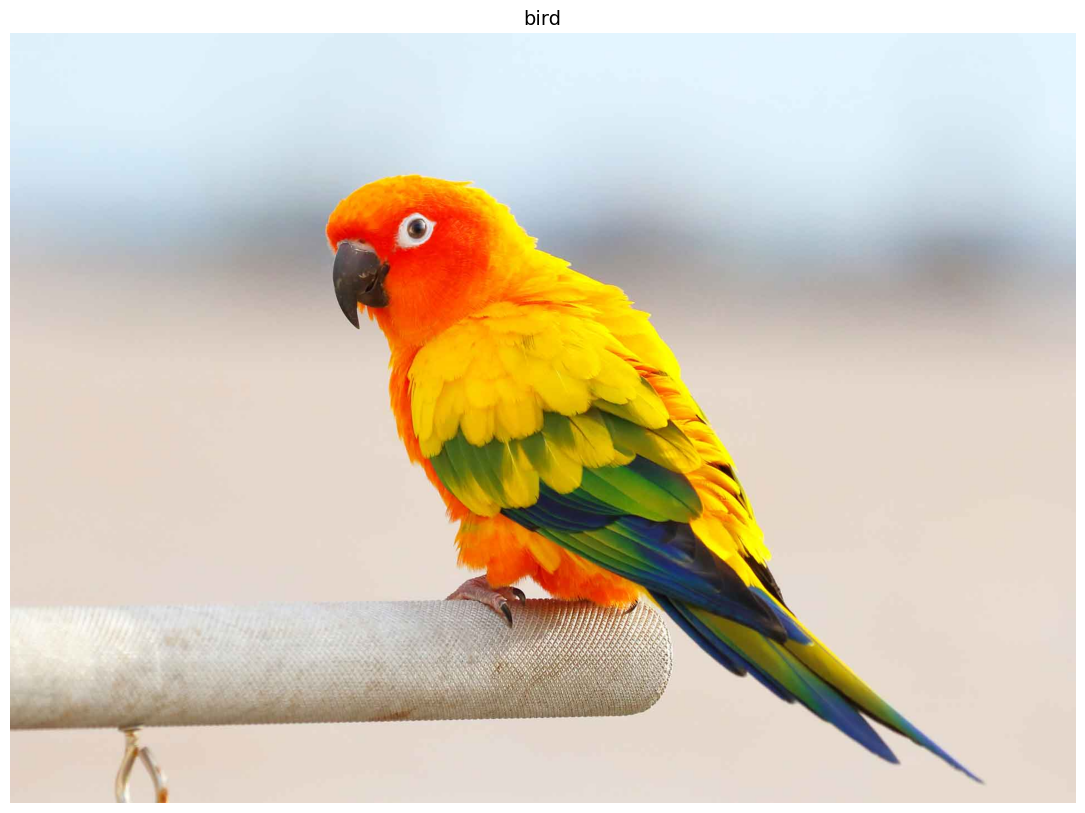

In [152]:
bird = cv.imread("bird.jpeg",-1)
imshow("bird",bird)

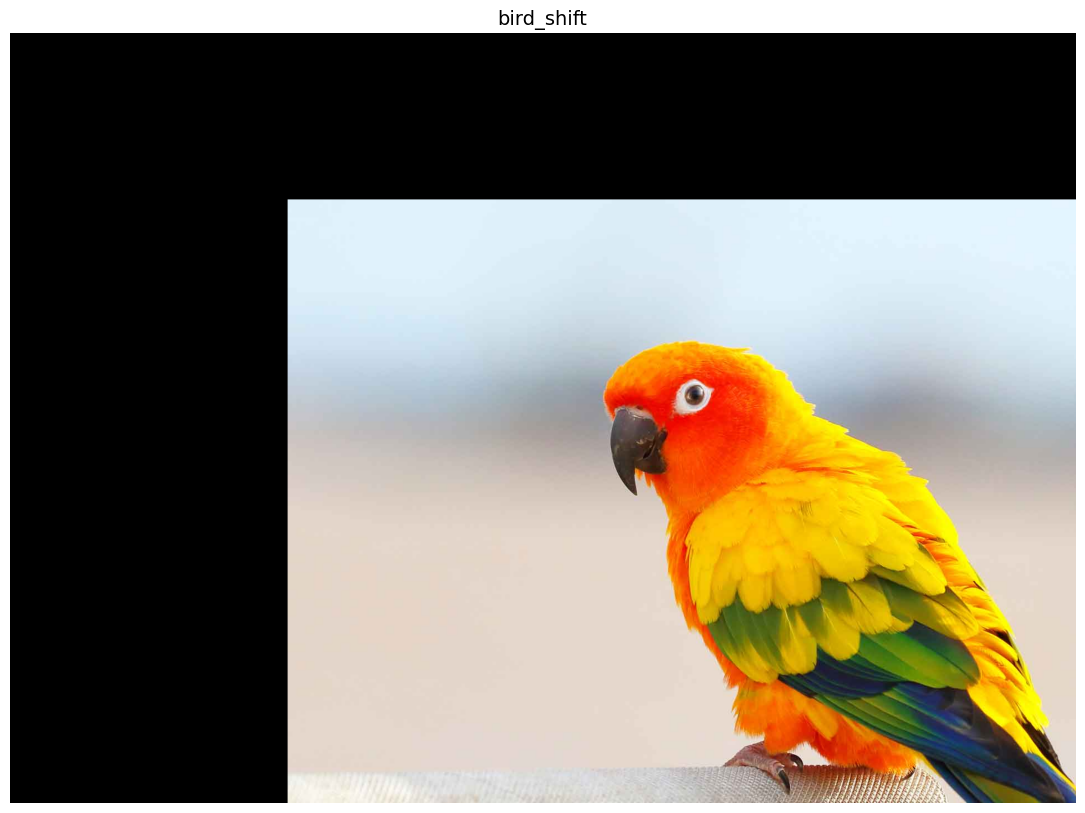

In [153]:
mat = np.float32([
    [1, 0, 500],  # سطر اول ماتریس تبدیل (جابجایی افقی)
    [0, 1, 300]   # سطر دوم ماتریس تبدیل (جابجایی عمودی)
])

bird_shift = cv.warpAffine(bird.copy(), mat, (bird.shape[1],bird.shape[0]))
imshow("bird_shift", bird_shift)

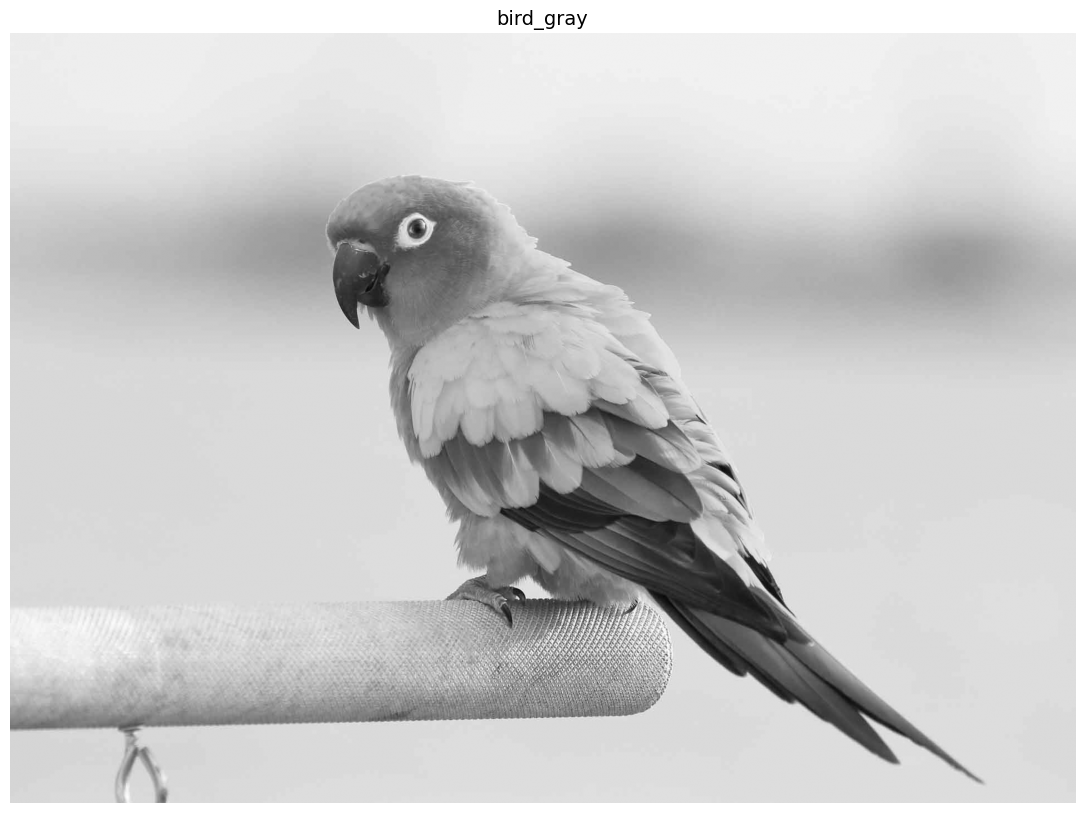

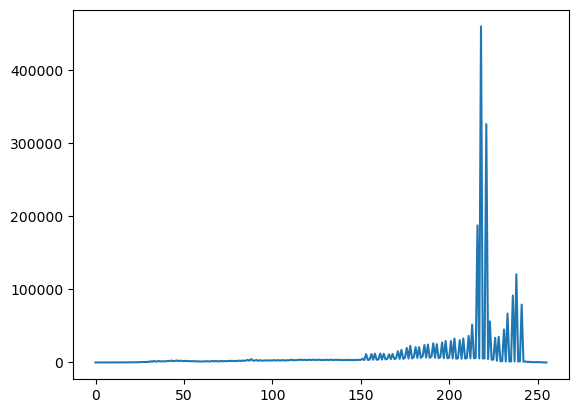

In [154]:
bird_gray = cv.cvtColor(bird, cv.COLOR_BGR2GRAY)
imshow("bird_gray", bird_gray)
hist = cv.calcHist([bird_gray],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

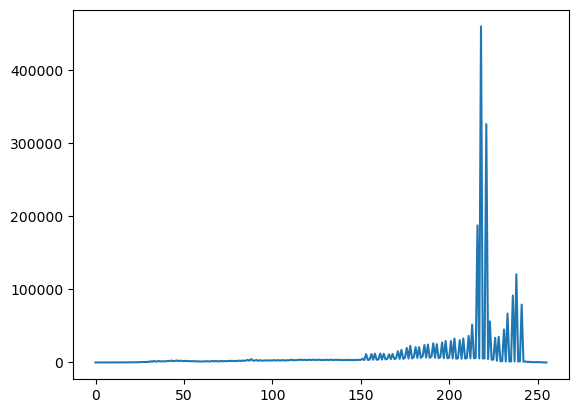

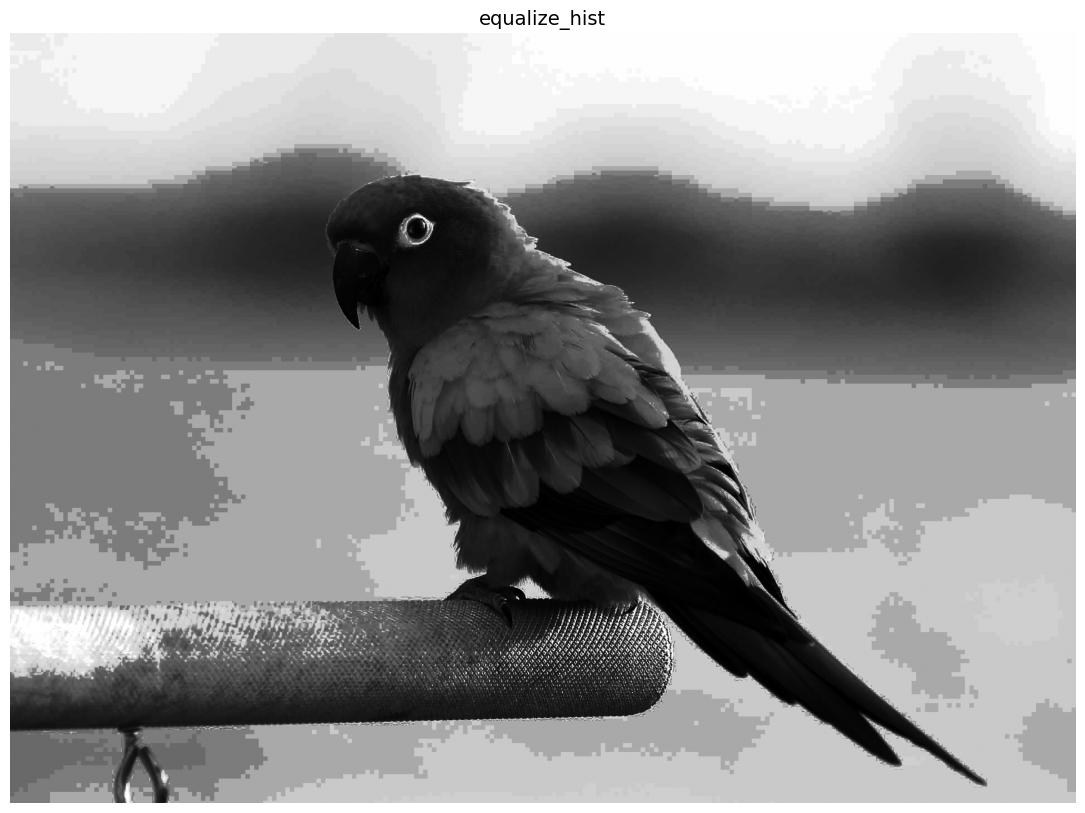

In [155]:
equalize_hist = cv.equalizeHist(bird_gray)
eq_hist = cv.calcHist([bird_gray],[0],None,[256],[0,256])
plt.plot(hist)
imshow("equalize_hist", equalize_hist)

<h1>Bluring</h1>

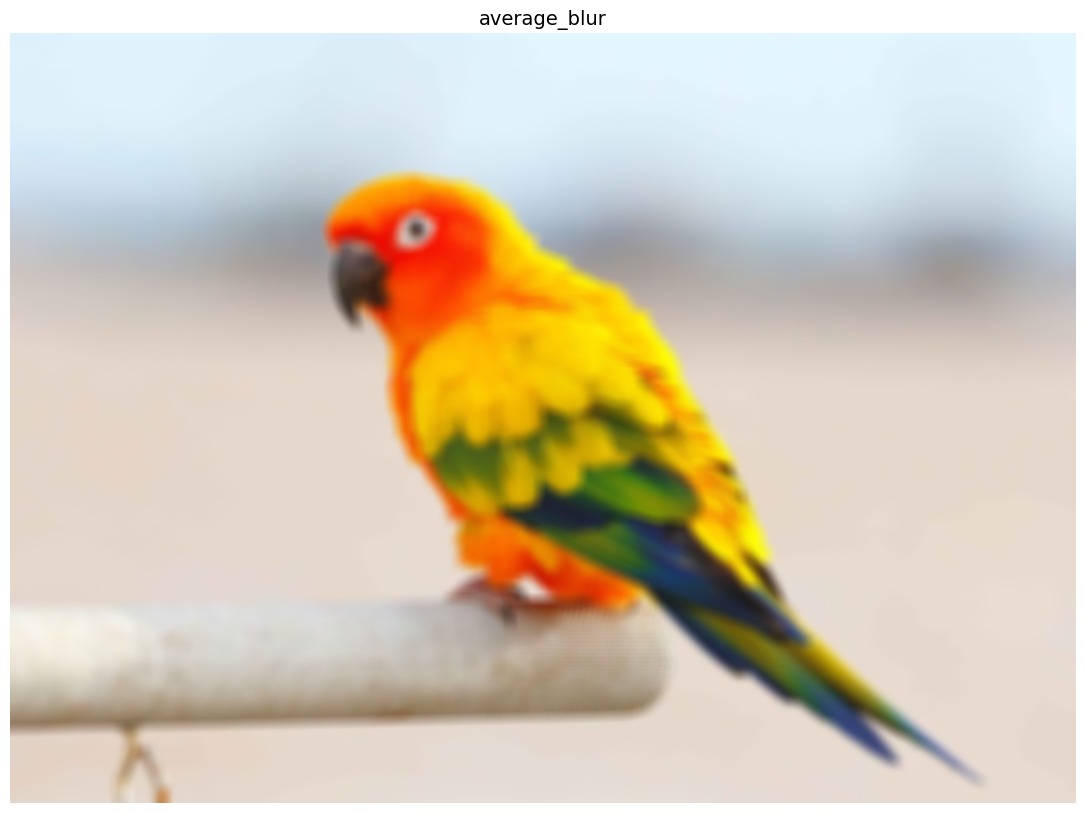

In [156]:
# kernel = (3,3) # کم blur می کنه 
kernel = (25,25)
average_blur = cv.blur(bird,kernel)
imshow("average_blur", average_blur)

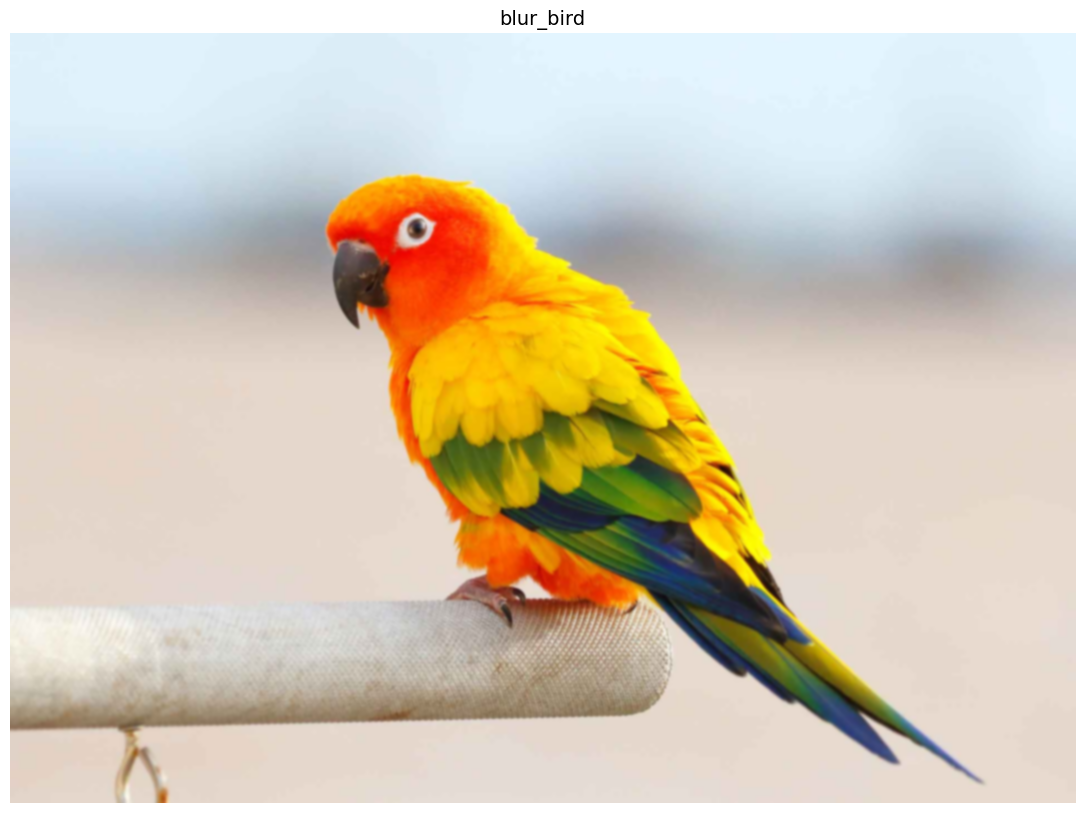

In [157]:
kernel = (25,25)
blur_bird = cv.GaussianBlur(bird,kernel,2)
imshow("blur_bird", blur_bird)

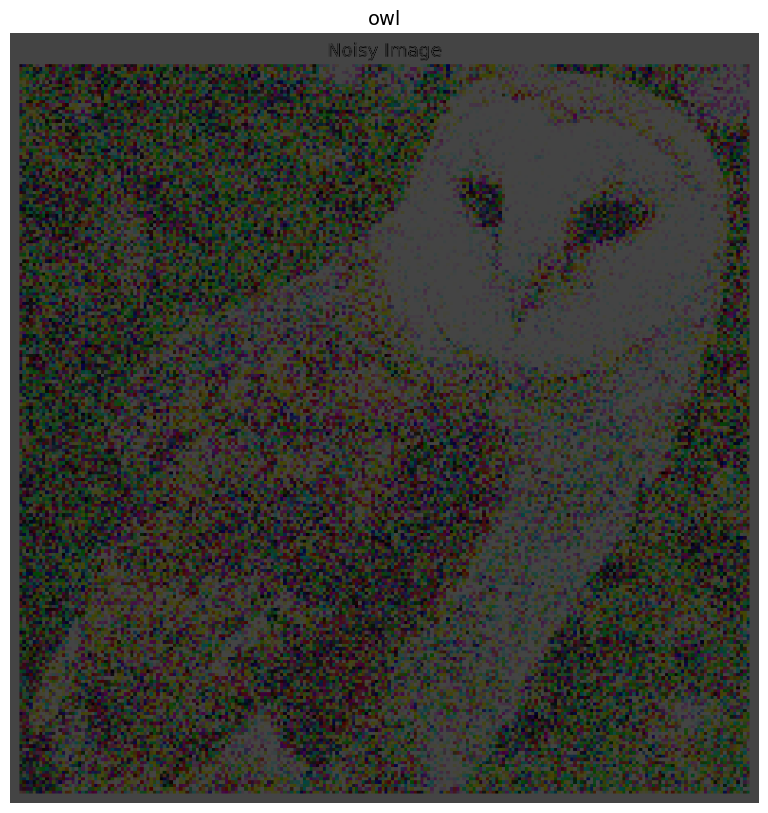

In [158]:
owl = cv.imread("owl_noisy.jpeg",-1)
owl = cv.convertScaleAbs(owl,None,0.5,-60)
imshow("owl",owl)

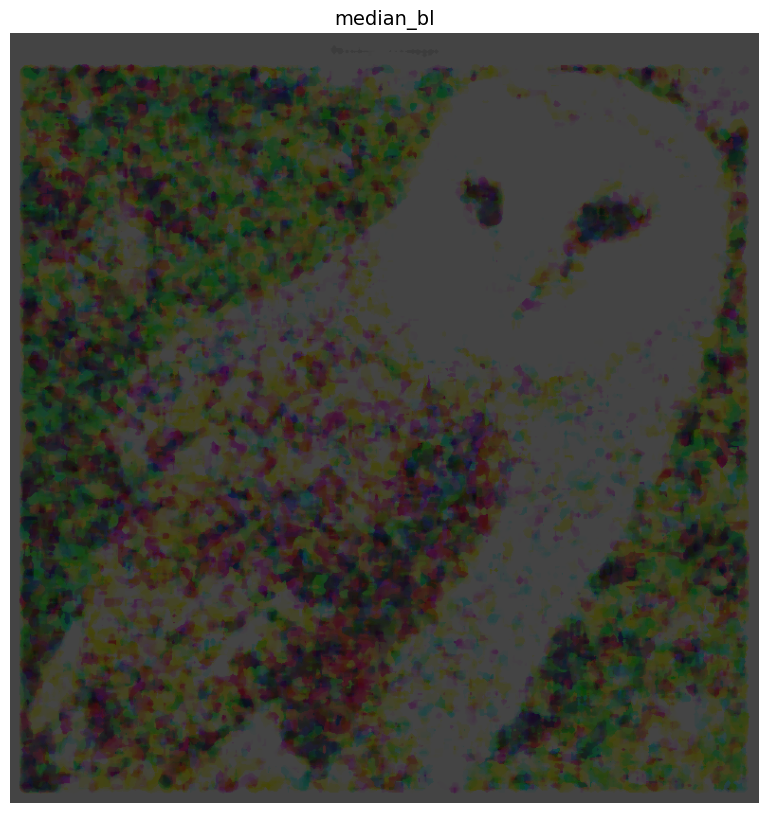

In [159]:
median_bl = cv.medianBlur(owl,11)
imshow("median_bl",median_bl)

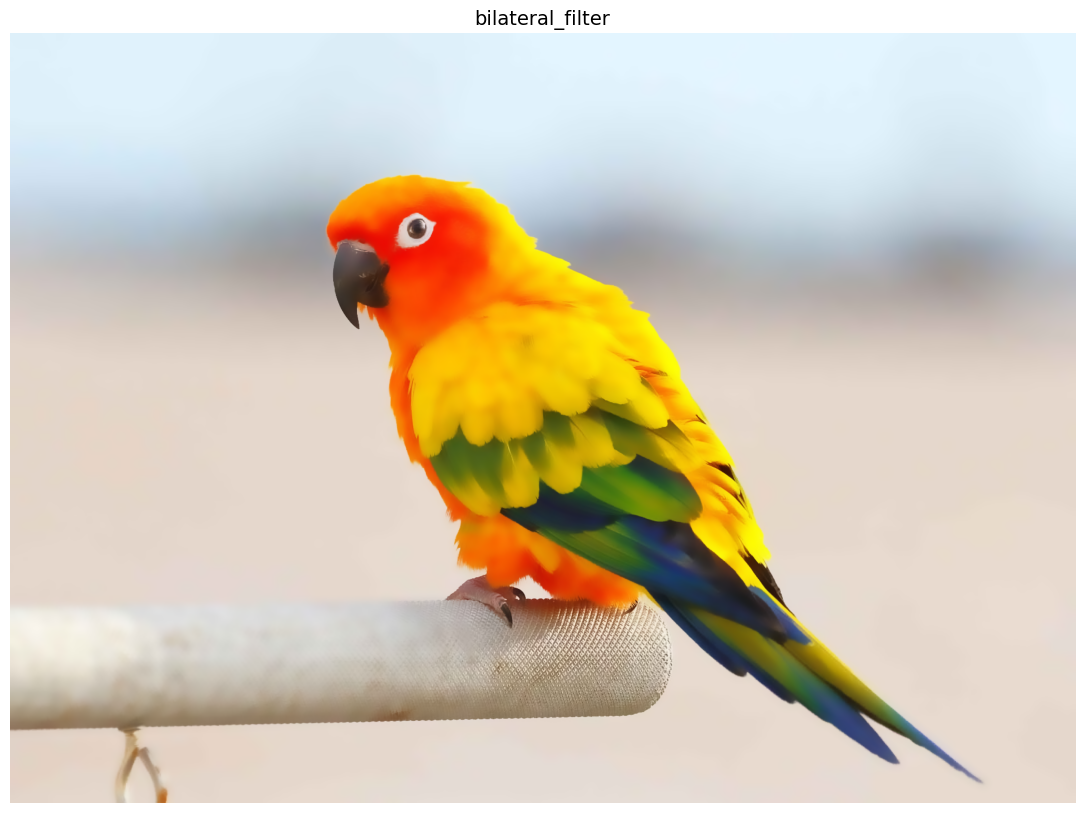

In [160]:
bilateral_filter = cv.bilateralFilter(bird,25,75,75)
imshow("bilateral_filter", bilateral_filter)

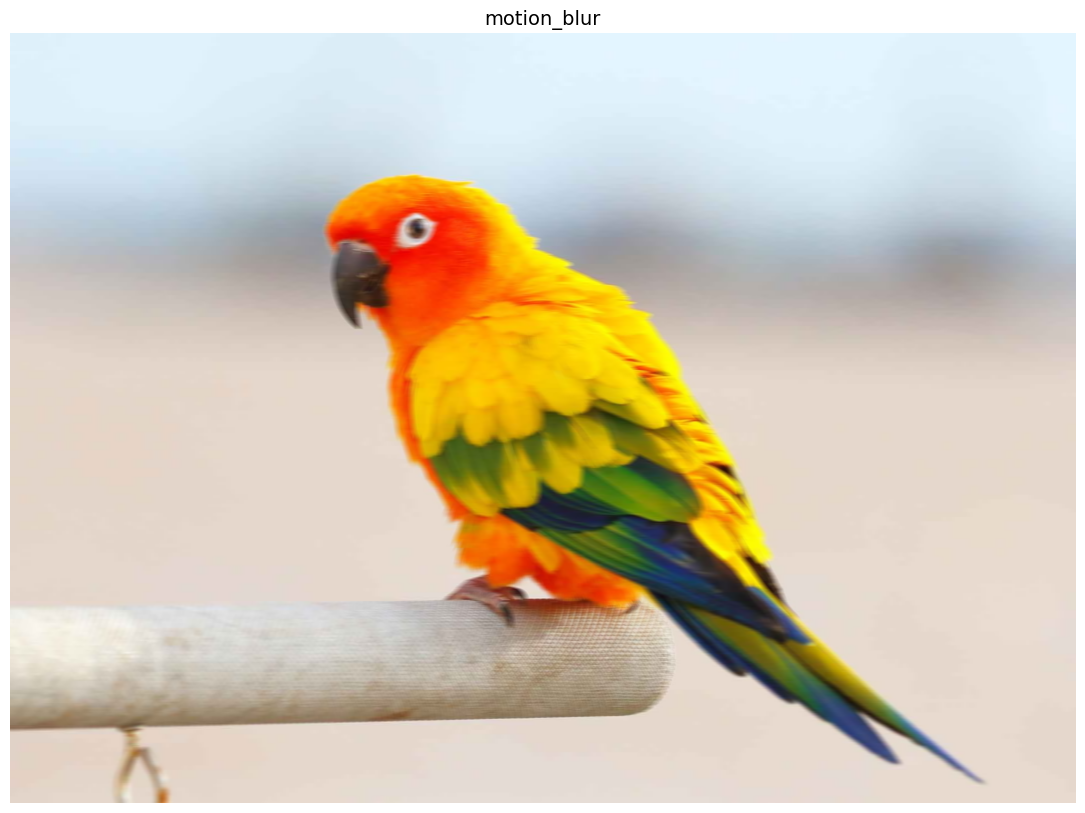

In [161]:
size = 15
kernel = np.zeros((size,size))
kernel[int((size -1) /2), :] = np.ones(size)
kernel = kernel / size

motion_blur = cv.filter2D(bird,-1,kernel)
imshow("motion_blur", motion_blur)


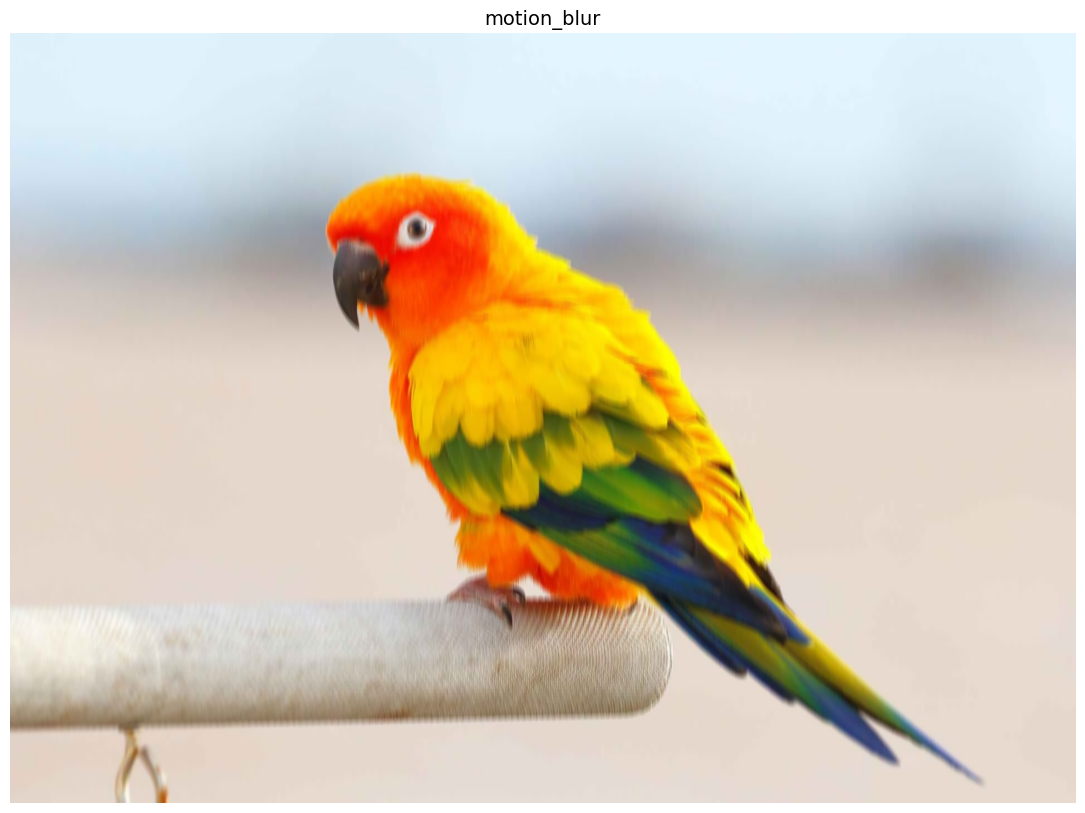

In [162]:
kernel = np.zeros((size,size))
kernel[:, int((size -1) /2)] = np.ones(size)
kernel = kernel / size



motion_blur = cv.filter2D(bird,-1,kernel)
imshow("motion_blur", motion_blur)


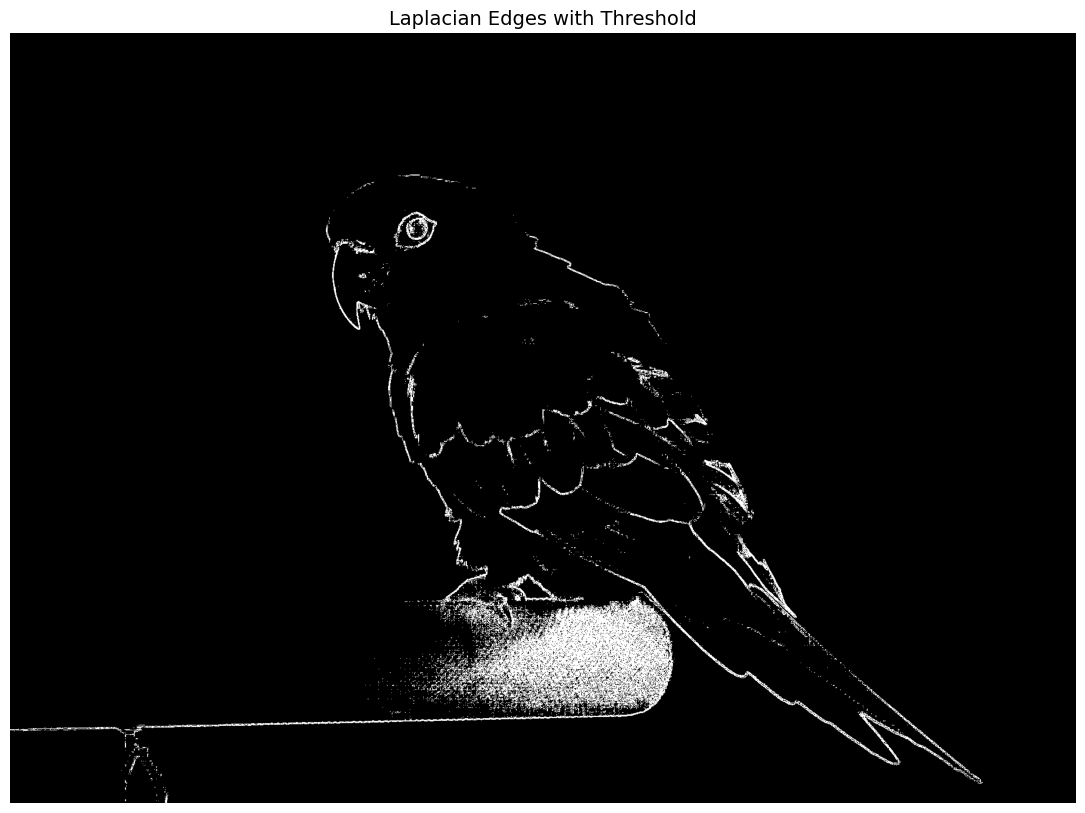

In [163]:
# مرحله 1: تبدیل تصویر رنگی به خاکستری
gray = cv.cvtColor(bilateral_filter, cv.COLOR_BGR2GRAY)

# مرحله 2: اعمال کرنل لاپلاسی (نسخه دستی)
lap_kernel = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
], dtype=np.float32)

laplacian = cv.filter2D(gray, ddepth=cv.CV_64F, kernel=lap_kernel)

# مرحله 3: تبدیل به تصویر مطلق برای حذف مقادیر منفی
laplacian_abs = cv.convertScaleAbs(laplacian)

# مرحله 4: آستانه‌گذاری برای نگه‌داشتن فقط لبه‌های قوی
_, thresh_edges = cv.threshold(laplacian_abs, 30, 255, cv.THRESH_BINARY)

# نمایش تصویر لبه‌ها بعد از threshold
imshow("Laplacian Edges with Threshold", thresh_edges)